In [1]:
import os
os.chdir("/mnt/d/데이터분석/Dacon/Classification_of_oil_condition")
project_path = os.getcwd()
project_path

'/mnt/d/데이터분석/Dacon/Classification_of_oil_condition'

In [2]:
import pandas as pd
import numpy as np

## 1. EDA

In [3]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

In [4]:
sel_col = test_df.columns.to_list()
sel_col.append('Y_LABEL')

In [5]:
eda_df = train_df[sel_col]
del train_df

import gc
gc.collect()

eda_df

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,200,0,0,0,1,37,0.0,1,0,0,44,0,0,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,200,0,0,0,0,71,0.0,0,0,0,217,0,0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,200,0,0,0,3,23,0.0,0,0,0,35,0,0,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,200,0,0,0,2,12,0.0,0,224,0,9,0,0,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,550,0,0,4,7,415,0.0,7,10,1,645,0,0,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,550,0,0,0,170,19,0.0,0,1,0,11,0,0,44.3,652,0


#### 기초 통계

In [7]:
eda_df['COMPONENT_ARBITRARY'].value_counts()

COMPONENT3    7050
COMPONENT1    3890
COMPONENT2    2316
COMPONENT4     839
Name: COMPONENT_ARBITRARY, dtype: int64

In [6]:
eda_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ANONYMOUS_1,14095.0,3146.082937,4216.089809,1000.0,1655.0,2227.0,3797.0,294451.0
YEAR,14095.0,2013.652501,3.964758,2007.0,2010.0,2014.0,2017.0,2022.0
ANONYMOUS_2,14095.0,387.416885,550.016073,200.0,200.0,200.0,410.0,9650.0
AG,14095.0,0.025825,0.171926,0.0,0.0,0.0,0.0,3.0
CO,14095.0,0.028166,0.314249,0.0,0.0,0.0,0.0,27.0
CR,14095.0,3.299468,28.595510,0.0,0.0,1.0,3.0,2398.0
CU,14095.0,34.560624,128.958953,0.0,1.0,4.0,17.0,5701.0
FE,14095.0,178.169280,533.208976,0.0,14.0,41.0,139.0,31706.0
H2O,14095.0,0.033650,0.809162,0.0,0.0,0.0,0.0,52.7
MN,14095.0,2.787939,11.131836,0.0,0.0,1.0,2.0,877.0


In [21]:
eda_df['Y_LABEL'].value_counts() ## 데이터가 imblance 함 -> 오버 샘플링 필요

0    12892
1     1203
Name: Y_LABEL, dtype: int64

### 각 피쳐 분포 확인

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.rcParams['axes.unicode_minus'] = False

In [8]:
eda_df.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG',
       'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V',
       'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

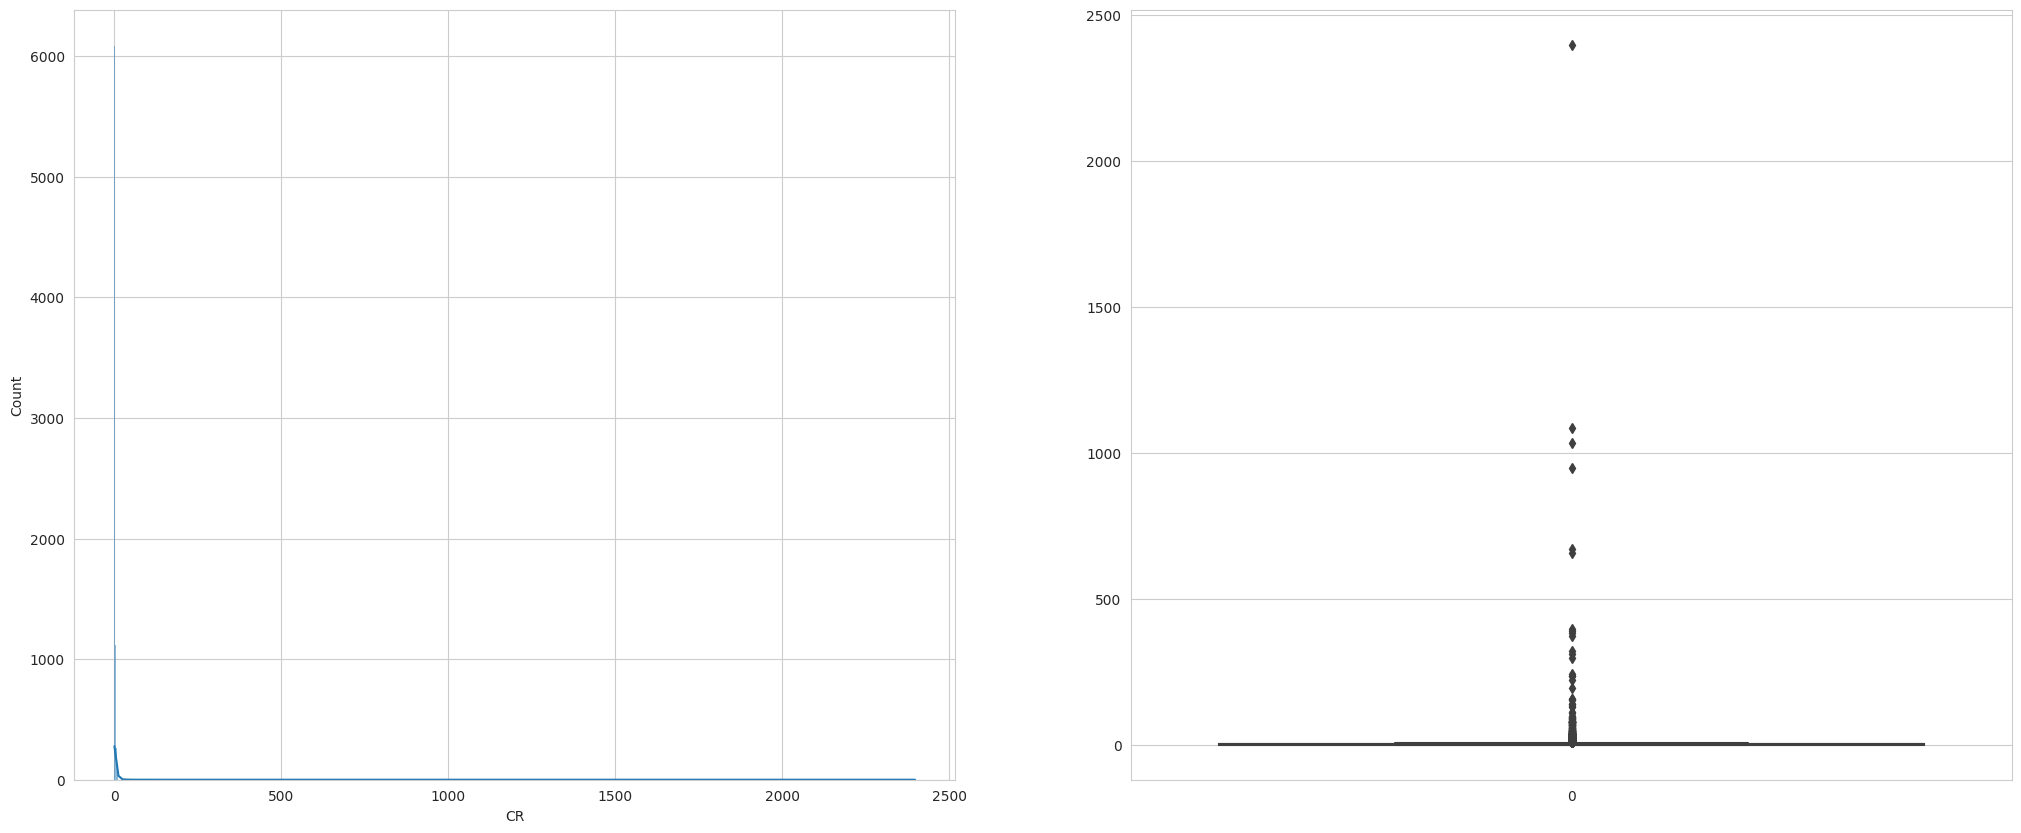

In [14]:
fig = plt.figure(figsize=(25,10))

ax1 = plt.subplot(1,2,1)
sns.histplot(eda_df['CR'],kde=True)

ax2 = plt.subplot(1,2,2)
sns.boxplot(eda_df['CR'])

plt.show()

## 2. 데이터 전처리

### 피쳐 정규화

In [15]:
train_col = ['ANONYMOUS_1', 'ANONYMOUS_2', 'AG','CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V','V40', 'ZN']
final_train = eda_df[train_col]
final_y = eda_df['Y_LABEL']

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
final_train_scaled = scaler.fit_transform(final_train)
final_train_scaled

array([[0.00165615, 0.        , 0.        , ..., 0.        , 0.05324922,
        0.03517824],
       [0.0011927 , 0.01851852, 0.        , ..., 0.        , 0.01448407,
        0.30581614],
       [0.00482193, 0.        , 0.        , ..., 0.        , 0.02456301,
        0.19324578],
       ...,
       [0.00268529, 0.03703704, 0.        , ..., 0.        , 0.01800818,
        0.61022514],
       [0.00510477, 0.03703704, 0.        , ..., 0.        , 0.01458979,
        0.30581614],
       [0.00307377, 0.        , 0.        , ..., 0.        , 0.0155413 ,
        0.28705441]])

### SMOTE

In [21]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE()
#
# x_resampled, y_resampled = sm.fit_resample(final_train_scaled, final_y)
# y_resampled

In [50]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# target_result = le.fit_transform(y_resampled)
# target_result

array([0, 0, 1, ..., 1, 1, 1])

### Learning

In [29]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from xgboost import XGBClassifier

In [75]:
final_train_scaled.shape

(14095, 16)

In [76]:
final_y.shape

(14095,)

In [77]:
# x_train, x_val, y_train, y_val = train_test_split(x_resampled, y_resampled, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(final_train_scaled, final_y, test_size=0.2, stratify=final_y)

In [78]:
y_train

12787    0
11077    0
7229     0
4456     0
13222    0
        ..
3395     0
5255     0
11511    0
12879    0
5212     0
Name: Y_LABEL, Length: 11276, dtype: int64

In [79]:
xgb_model = XGBClassifier(booster='gbtree',
                          silent=False,
                          min_child_weight=10,
                          max_depth=8,
                          gamma=0,
                          nthread=4,
                          colsample_bytree=0.8,
                          colsample_bylevel=0.9,
                          n_estimators= 200,
                          object='binary:logistic',
                          eval_metric='error',
                          learning_rate=0.05)


xgb_model.fit(x_train, y_train, eval_set=[(x_val, y_val)])

[23:43:55] WARNING: ../src/learner.cc:767: 
Parameters: { "object", "silent" } are not used.

[0]	validation_0-error:0.08549
[1]	validation_0-error:0.08549
[2]	validation_0-error:0.08549
[3]	validation_0-error:0.08549
[4]	validation_0-error:0.08549
[5]	validation_0-error:0.08549
[6]	validation_0-error:0.08549
[7]	validation_0-error:0.08549
[8]	validation_0-error:0.08549
[9]	validation_0-error:0.08549
[10]	validation_0-error:0.08549
[11]	validation_0-error:0.08549
[12]	validation_0-error:0.08549
[13]	validation_0-error:0.08549
[14]	validation_0-error:0.08549
[15]	validation_0-error:0.08549
[16]	validation_0-error:0.08549
[17]	validation_0-error:0.08549
[18]	validation_0-error:0.08549
[19]	validation_0-error:0.08549
[20]	validation_0-error:0.08549
[21]	validation_0-error:0.08549
[22]	validation_0-error:0.08549
[23]	validation_0-error:0.08549
[24]	validation_0-error:0.08549
[25]	validation_0-error:0.08549
[26]	validation_0-error:0.08549
[27]	validation_0-error:0.08549
[28]	validation_0-er

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=10, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4, nthread=4,
              num_parallel_tree=1, object='binary:logistic', ...)

In [80]:
test_df = pd.read_csv('dataset/test.csv')
test_df

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,TEST_6036,COMPONENT3,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.2,1163
6037,TEST_6037,COMPONENT3,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.8,13
6038,TEST_6038,COMPONENT3,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.2,13
6039,TEST_6039,COMPONENT2,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.1,478


In [81]:
test_final = test_df[train_col]
final_test_scaled = scaler.fit_transform(test_final)
final_test_scaled

array([[0.00499644, 0.        , 0.        , ..., 0.        , 0.19811066,
        0.56447437],
       [0.00751981, 0.        , 0.        , ..., 0.        , 0.29419703,
        0.00569653],
       [0.00411619, 0.        , 0.        , ..., 0.        , 0.07125506,
        0.36923874],
       ...,
       [0.01393721, 0.        , 0.        , ..., 0.        , 0.76734143,
        0.0062144 ],
       [0.00152576, 0.        , 0.        , ..., 0.        , 0.08960864,
        0.24702227],
       [0.00585572, 0.14783069, 0.5       , ..., 0.        , 0.16761134,
        0.50181253]])

In [82]:
y_pred = xgb_model.predict(final_test_scaled)

In [83]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
submit = pd.read_csv('dataset/submit.csv')
submit

,ID,Y_LABEL
0,TEST_0000,1
1,TEST_0001,1
2,TEST_0002,0
3,TEST_0003,1
4,TEST_0004,1
...,...,...
6036,TEST_6036,1
6037,TEST_6037,1
6038,TEST_6038,0
6039,TEST_6039,1


In [85]:
submit['Y_LABEL'] = y_pred

In [86]:
submit['Y_LABEL'].value_counts()

0    6026
1      15
Name: Y_LABEL, dtype: int64

In [88]:
submit.to_csv('dataset/submit.csv', index=False)